In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy.optimize import fsolve

C:\Users\tatyana.pashinskaya\AppData\Local\conda\conda\envs\newone\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\tatyana.pashinskaya\AppData\Local\conda\conda\envs\newone\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\tatyana.pashinskaya\AppData\Local\conda\conda\envs\newone\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [ ]:
# def recalculate_D(x, y, N_coins, A):
#     S = x + y
#     xp = [x, y]

#     Dprev = 0
#     D = S
#     Ann = A * N_COINS
#     for _i in range(255):
#         D_P = D
#         for _x in xp:
#             D_P = D_P * D / (_x * N_COINS + 1)  # +1 is to prevent /0
#         Dprev = D
#         D = (Ann * S + D_P * N_COINS) * D / ((Ann - 1) * D + (N_COINS + 1) * D_P)
#         # Equality with the precision of 1
#         if D > Dprev:
#             if D - Dprev <= 1:
#                 break
#         else:
#             if Dprev - D <= 1:
#                 break
                
#     return D

In [2]:
data = pd.read_csv('F:/Scripts/DeFi/Amplification/bLuna_luna.csv', index_col=0)

In [3]:
data

,BLOCKCHAIN,CHAIN_ID,BLOCK_ID,BLOCK_TIMESTAMP,CONTRACT_ADDRESS,TOTAL_SHARE,TOKEN_0_CURRENCY,TOKEN_0_AMOUNT,TOKEN_1_CURRENCY,TOKEN_1_AMOUNT,timestamp,seconds,price0,price1
242366,terra,columbus-5,5846709,2021-12-28 00:00:07.510,terra1jxazgm67et0ce260kvrpfv50acuushpjsz2y0p,473050.739237,terra1kc87mu460fwkqte29rquh4hc20m54fxwtsx7gp,666703.563524,uluna,653112.321942,1.640650e+09,NaN,1.020810,0.979614
259181,terra,columbus-5,5846711,2021-12-28 00:00:20.450,terra1jxazgm67et0ce260kvrpfv50acuushpjsz2y0p,473050.739237,terra1kc87mu460fwkqte29rquh4hc20m54fxwtsx7gp,666703.563524,uluna,653112.321942,1.640650e+09,12.940,1.020810,0.979614
266761,terra,columbus-5,5846713,2021-12-28 00:00:33.357,terra1jxazgm67et0ce260kvrpfv50acuushpjsz2y0p,473050.739237,terra1kc87mu460fwkqte29rquh4hc20m54fxwtsx7gp,666703.563524,uluna,653112.321942,1.640650e+09,12.907,1.020810,0.979614
258451,terra,columbus-5,5846716,2021-12-28 00:00:52.978,terra1jxazgm67et0ce260kvrpfv50acuushpjsz2y0p,473405.647350,terra1kc87mu460fwkqte29rquh4hc20m54fxwtsx7gp,667203.029542,uluna,653603.040061,1.640650e+09,19.621,1.020808,0.979616
271251,terra,columbus-5,5846717,2021-12-28 00:00:59.111,terra1jxazgm67et0ce260kvrpfv50acuushpjsz2y0p,473405.647350,terra1kc87mu460fwkqte29rquh4hc20m54fxwtsx7gp,667436.029542,uluna,653375.553630,1.640650e+09,6.133,1.021520,0.978934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235061,terra,columbus-5,6208698,2022-01-24 23:57:43.106,terra1jxazgm67et0ce260kvrpfv50acuushpjsz2y0p,516660.936377,terra1kc87mu460fwkqte29rquh4hc20m54fxwtsx7gp,737433.594255,uluna,720219.550584,1.643069e+09,91.176,1.023901,0.976657
228297,terra,columbus-5,6208699,2022-01-24 23:57:49.450,terra1jxazgm67et0ce260kvrpfv50acuushpjsz2y0p,516660.936377,terra1kc87mu460fwkqte29rquh4hc20m54fxwtsx7gp,737433.594255,uluna,720219.550584,1.643069e+09,6.344,1.023901,0.976657
228483,terra,columbus-5,6208706,2022-01-24 23:58:33.629,terra1jxazgm67et0ce260kvrpfv50acuushpjsz2y0p,516660.936377,terra1kc87mu460fwkqte29rquh4hc20m54fxwtsx7gp,737433.594255,uluna,720219.550584,1.643069e+09,44.179,1.023901,0.976657
240632,terra,columbus-5,6208710,2022-01-24 23:58:59.204,terra1jxazgm67et0ce260kvrpfv50acuushpjsz2y0p,516660.936377,terra1kc87mu460fwkqte29rquh4hc20m54fxwtsx7gp,737433.594255,uluna,720219.550584,1.643069e+09,25.575,1.023901,0.976657


In [4]:
data['token0_swap'] = (data.TOKEN_0_AMOUNT - data.TOKEN_0_AMOUNT.shift(1))
data['token1_swap'] = (data.TOKEN_1_AMOUNT - data.TOKEN_1_AMOUNT.shift(1))

In [5]:
data

,BLOCKCHAIN,CHAIN_ID,BLOCK_ID,BLOCK_TIMESTAMP,CONTRACT_ADDRESS,TOTAL_SHARE,TOKEN_0_CURRENCY,TOKEN_0_AMOUNT,TOKEN_1_CURRENCY,TOKEN_1_AMOUNT,timestamp,seconds,price0,price1,token0_swap,token1_swap
242366,terra,columbus-5,5846709,2021-12-28 00:00:07.510,terra1jxazgm67et0ce260kvrpfv50acuushpjsz2y0p,473050.739237,terra1kc87mu460fwkqte29rquh4hc20m54fxwtsx7gp,666703.563524,uluna,653112.321942,1.640650e+09,NaN,1.020810,0.979614,NaN,NaN
259181,terra,columbus-5,5846711,2021-12-28 00:00:20.450,terra1jxazgm67et0ce260kvrpfv50acuushpjsz2y0p,473050.739237,terra1kc87mu460fwkqte29rquh4hc20m54fxwtsx7gp,666703.563524,uluna,653112.321942,1.640650e+09,12.940,1.020810,0.979614,0.000000,0.000000
266761,terra,columbus-5,5846713,2021-12-28 00:00:33.357,terra1jxazgm67et0ce260kvrpfv50acuushpjsz2y0p,473050.739237,terra1kc87mu460fwkqte29rquh4hc20m54fxwtsx7gp,666703.563524,uluna,653112.321942,1.640650e+09,12.907,1.020810,0.979614,0.000000,0.000000
258451,terra,columbus-5,5846716,2021-12-28 00:00:52.978,terra1jxazgm67et0ce260kvrpfv50acuushpjsz2y0p,473405.647350,terra1kc87mu460fwkqte29rquh4hc20m54fxwtsx7gp,667203.029542,uluna,653603.040061,1.640650e+09,19.621,1.020808,0.979616,499.466018,490.718119
271251,terra,columbus-5,5846717,2021-12-28 00:00:59.111,terra1jxazgm67et0ce260kvrpfv50acuushpjsz2y0p,473405.647350,terra1kc87mu460fwkqte29rquh4hc20m54fxwtsx7gp,667436.029542,uluna,653375.553630,1.640650e+09,6.133,1.021520,0.978934,233.000000,-227.486431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235061,terra,columbus-5,6208698,2022-01-24 23:57:43.106,terra1jxazgm67et0ce260kvrpfv50acuushpjsz2y0p,516660.936377,terra1kc87mu460fwkqte29rquh4hc20m54fxwtsx7gp,737433.594255,uluna,720219.550584,1.643069e+09,91.176,1.023901,0.976657,0.000000,0.000000
228297,terra,columbus-5,6208699,2022-01-24 23:57:49.450,terra1jxazgm67et0ce260kvrpfv50acuushpjsz2y0p,516660.936377,terra1kc87mu460fwkqte29rquh4hc20m54fxwtsx7gp,737433.594255,uluna,720219.550584,1.643069e+09,6.344,1.023901,0.976657,0.000000,0.000000
228483,terra,columbus-5,6208706,2022-01-24 23:58:33.629,terra1jxazgm67et0ce260kvrpfv50acuushpjsz2y0p,516660.936377,terra1kc87mu460fwkqte29rquh4hc20m54fxwtsx7gp,737433.594255,uluna,720219.550584,1.643069e+09,44.179,1.023901,0.976657,0.000000,0.000000
240632,terra,columbus-5,6208710,2022-01-24 23:58:59.204,terra1jxazgm67et0ce260kvrpfv50acuushpjsz2y0p,516660.936377,terra1kc87mu460fwkqte29rquh4hc20m54fxwtsx7gp,737433.594255,uluna,720219.550584,1.643069e+09,25.575,1.023901,0.976657,0.000000,0.000000


In [6]:
#data['col'] = data.token0_swap * data.token1_swap
data_clean = data[data.token0_swap * data.token1_swap<0]

In [7]:
data_clean

,BLOCKCHAIN,CHAIN_ID,BLOCK_ID,BLOCK_TIMESTAMP,CONTRACT_ADDRESS,TOTAL_SHARE,TOKEN_0_CURRENCY,TOKEN_0_AMOUNT,TOKEN_1_CURRENCY,TOKEN_1_AMOUNT,timestamp,seconds,price0,price1,token0_swap,token1_swap
271251,terra,columbus-5,5846717,2021-12-28 00:00:59.111,terra1jxazgm67et0ce260kvrpfv50acuushpjsz2y0p,473405.647350,terra1kc87mu460fwkqte29rquh4hc20m54fxwtsx7gp,667436.029542,uluna,653375.553630,1.640650e+09,6.133,1.021520,0.978934,233.000000,-227.486431
271523,terra,columbus-5,5846721,2021-12-28 00:01:26.295,terra1jxazgm67et0ce260kvrpfv50acuushpjsz2y0p,473405.647350,terra1kc87mu460fwkqte29rquh4hc20m54fxwtsx7gp,667330.833028,uluna,653478.860232,1.640650e+09,27.184,1.021197,0.979243,-105.196514,103.306602
247888,terra,columbus-5,5846725,2021-12-28 00:01:52.146,terra1jxazgm67et0ce260kvrpfv50acuushpjsz2y0p,473405.647350,terra1kc87mu460fwkqte29rquh4hc20m54fxwtsx7gp,667328.813342,uluna,653480.843952,1.640650e+09,19.244,1.021191,0.979249,-2.019686,1.983720
267324,terra,columbus-5,5846739,2021-12-28 00:03:26.952,terra1jxazgm67et0ce260kvrpfv50acuushpjsz2y0p,473405.647350,terra1kc87mu460fwkqte29rquh4hc20m54fxwtsx7gp,667264.423861,uluna,653544.199465,1.640650e+09,62.405,1.020994,0.979438,-64.389481,63.355513
254618,terra,columbus-5,5846745,2021-12-28 00:04:14.359,terra1jxazgm67et0ce260kvrpfv50acuushpjsz2y0p,473405.647350,terra1kc87mu460fwkqte29rquh4hc20m54fxwtsx7gp,667564.423861,uluna,653251.381180,1.640650e+09,6.343,1.021910,0.978559,300.000000,-292.818285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234186,terra,columbus-5,6208570,2022-01-24 23:43:50.979,terra1jxazgm67et0ce260kvrpfv50acuushpjsz2y0p,516660.633570,terra1kc87mu460fwkqte29rquh4hc20m54fxwtsx7gp,737203.519097,uluna,720442.738721,1.643068e+09,50.776,1.023265,0.977264,14.570541,-14.196833
233236,terra,columbus-5,6208580,2022-01-24 23:44:55.107,terra1jxazgm67et0ce260kvrpfv50acuushpjsz2y0p,516660.633570,terra1kc87mu460fwkqte29rquh4hc20m54fxwtsx7gp,737193.406717,uluna,720452.651063,1.643068e+09,38.005,1.023236,0.977291,-10.112380,9.912342
228267,terra,columbus-5,6208588,2022-01-24 23:45:45.693,terra1jxazgm67et0ce260kvrpfv50acuushpjsz2y0p,516660.633570,terra1kc87mu460fwkqte29rquh4hc20m54fxwtsx7gp,737191.819412,uluna,720454.206994,1.643068e+09,44.283,1.023232,0.977295,-1.587305,1.555931
231742,terra,columbus-5,6208604,2022-01-24 23:47:29.122,terra1jxazgm67et0ce260kvrpfv50acuushpjsz2y0p,516660.633570,terra1kc87mu460fwkqte29rquh4hc20m54fxwtsx7gp,737194.612195,uluna,720451.485818,1.643068e+09,31.396,1.023240,0.977288,2.792783,-2.721176


In [8]:
data_clean.TOKEN_1_AMOUNT / (data_clean.TOKEN_0_AMOUNT+data_clean.TOKEN_1_AMOUNT)

271251    0.494677
271523    0.494756
247888    0.494758
267324    0.494806
254618    0.494582
            ...   
234186    0.494251
233236    0.494258
228267    0.494259
231742    0.494257
233291    0.494095
Length: 12300, dtype: float64

In [9]:
data_clean['balance'] = 1 - abs(data_clean.TOKEN_1_AMOUNT/(data_clean.TOKEN_0_AMOUNT+data_clean.TOKEN_1_AMOUNT) - 0.5) - abs(data_clean.TOKEN_0_AMOUNT/(data_clean.TOKEN_0_AMOUNT+data_clean.TOKEN_1_AMOUNT) - 0.5)

C:\Users\tatyana.pashinskaya\AppData\Local\conda\conda\envs\newone\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
data_clean

,BLOCKCHAIN,CHAIN_ID,BLOCK_ID,BLOCK_TIMESTAMP,CONTRACT_ADDRESS,TOTAL_SHARE,TOKEN_0_CURRENCY,TOKEN_0_AMOUNT,TOKEN_1_CURRENCY,TOKEN_1_AMOUNT,timestamp,seconds,price0,price1,token0_swap,token1_swap,balance
271251,terra,columbus-5,5846717,2021-12-28 00:00:59.111,terra1jxazgm67et0ce260kvrpfv50acuushpjsz2y0p,473405.647350,terra1kc87mu460fwkqte29rquh4hc20m54fxwtsx7gp,667436.029542,uluna,653375.553630,1.640650e+09,6.133,1.021520,0.978934,233.000000,-227.486431,0.989355
271523,terra,columbus-5,5846721,2021-12-28 00:01:26.295,terra1jxazgm67et0ce260kvrpfv50acuushpjsz2y0p,473405.647350,terra1kc87mu460fwkqte29rquh4hc20m54fxwtsx7gp,667330.833028,uluna,653478.860232,1.640650e+09,27.184,1.021197,0.979243,-105.196514,103.306602,0.989513
247888,terra,columbus-5,5846725,2021-12-28 00:01:52.146,terra1jxazgm67et0ce260kvrpfv50acuushpjsz2y0p,473405.647350,terra1kc87mu460fwkqte29rquh4hc20m54fxwtsx7gp,667328.813342,uluna,653480.843952,1.640650e+09,19.244,1.021191,0.979249,-2.019686,1.983720,0.989516
267324,terra,columbus-5,5846739,2021-12-28 00:03:26.952,terra1jxazgm67et0ce260kvrpfv50acuushpjsz2y0p,473405.647350,terra1kc87mu460fwkqte29rquh4hc20m54fxwtsx7gp,667264.423861,uluna,653544.199465,1.640650e+09,62.405,1.020994,0.979438,-64.389481,63.355513,0.989612
254618,terra,columbus-5,5846745,2021-12-28 00:04:14.359,terra1jxazgm67et0ce260kvrpfv50acuushpjsz2y0p,473405.647350,terra1kc87mu460fwkqte29rquh4hc20m54fxwtsx7gp,667564.423861,uluna,653251.381180,1.640650e+09,6.343,1.021910,0.978559,300.000000,-292.818285,0.989163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234186,terra,columbus-5,6208570,2022-01-24 23:43:50.979,terra1jxazgm67et0ce260kvrpfv50acuushpjsz2y0p,516660.633570,terra1kc87mu460fwkqte29rquh4hc20m54fxwtsx7gp,737203.519097,uluna,720442.738721,1.643068e+09,50.776,1.023265,0.977264,14.570541,-14.196833,0.988501
233236,terra,columbus-5,6208580,2022-01-24 23:44:55.107,terra1jxazgm67et0ce260kvrpfv50acuushpjsz2y0p,516660.633570,terra1kc87mu460fwkqte29rquh4hc20m54fxwtsx7gp,737193.406717,uluna,720452.651063,1.643068e+09,38.005,1.023236,0.977291,-10.112380,9.912342,0.988515
228267,terra,columbus-5,6208588,2022-01-24 23:45:45.693,terra1jxazgm67et0ce260kvrpfv50acuushpjsz2y0p,516660.633570,terra1kc87mu460fwkqte29rquh4hc20m54fxwtsx7gp,737191.819412,uluna,720454.206994,1.643068e+09,44.283,1.023232,0.977295,-1.587305,1.555931,0.988517
231742,terra,columbus-5,6208604,2022-01-24 23:47:29.122,terra1jxazgm67et0ce260kvrpfv50acuushpjsz2y0p,516660.633570,terra1kc87mu460fwkqte29rquh4hc20m54fxwtsx7gp,737194.612195,uluna,720451.485818,1.643068e+09,31.396,1.023240,0.977288,2.792783,-2.721176,0.988514


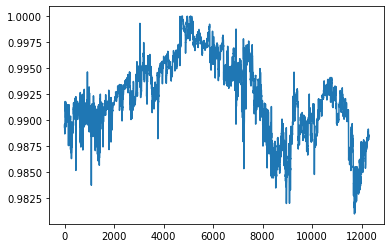

In [11]:
plt.plot(data_clean.balance.values)

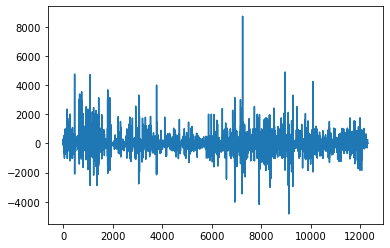

In [12]:
plt.plot(data_clean.token0_swap.values)

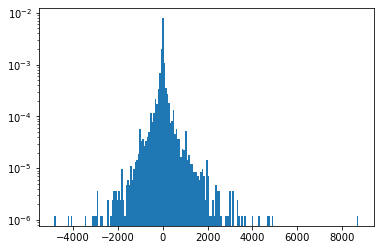

In [13]:
plt.hist(data_clean.token0_swap.values, density=True, bins=200, log = True);

In [177]:
#Start

lst = []
#C = 10000
#x = C/2
#y = C/2

A_rng = np.arange(1, 1000, 0.5)
#A = 10
#A = A * 4

for A in A_rng:
    C = 1300000
    x = C/2
    y = C/2
    dx = data_clean.token0_swap.values[100]
    x1 = x + dx

    b = (1 - 1 / A) * C - x1

    dsc = 4*C * (C/2)**2 / (A*x1) + b**2
    y1 = (np.sqrt(dsc) + b) / 2
    dy = y - y1

    balance = 1 - abs(x1/(x1+y1)- 1/2) - abs(y1/(x1+y1)- 1/2)
    spot = x*(A*x*y + C**3/4)/(y*(A*x**2 + C**3/4))
    spot1 = x1*(A*x1*y1 + C**3/4)/(y1*(A*x1**2 + C**3/4))
    slippage = abs(spot1/spot - 1)#abs(abs((dx/dy)) / spot - 1)

    #coeff = [1/(4*x1*y1), 0, (A-1), -A*(x1+y1)]
    #roots = np.roots(coeff)
    #C = max(roots[roots.imag == 0].real)

    lst.append([x1, y1, dx, dy, balance, slippage, spot1])
    x = x1
    y = y1

In [178]:
df = pd.DataFrame(lst)
df = df.rename(columns={0: "x_new", 1: "y_new", 2: "dx", 3: "dy", 4: 'balance', 5: 'slippage', 6: 'spot'})
df

,x_new,y_new,dx,dy,balance,slippage,spot
0,650012.257215,649987.742939,12.257215,12.257061,0.999981,0.000038,1.000038
1,650012.257215,649987.742917,12.257215,12.257083,0.999981,0.000038,1.000038
2,650012.257215,649987.742901,12.257215,12.257099,0.999981,0.000038,1.000038
3,650012.257215,649987.742888,12.257215,12.257112,0.999981,0.000038,1.000038
4,650012.257215,649987.742877,12.257215,12.257123,0.999981,0.000038,1.000038
...,...,...,...,...,...,...,...
1993,650012.257215,649987.742785,12.257215,12.257215,0.999981,0.000038,1.000038
1994,650012.257215,649987.742785,12.257215,12.257215,0.999981,0.000038,1.000038
1995,650012.257215,649987.742785,12.257215,12.257215,0.999981,0.000038,1.000038
1996,650012.257215,649987.742785,12.257215,12.257215,0.999981,0.000038,1.000038


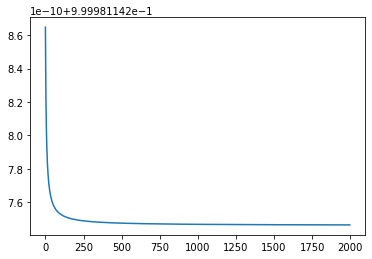

In [180]:
plt.plot(df.balance)

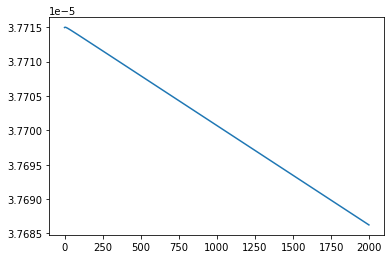

In [181]:
plt.plot(df.slippage)

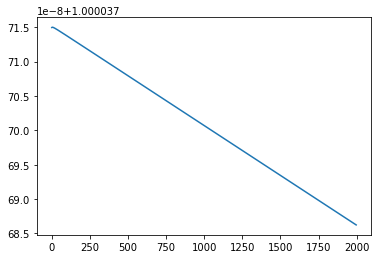

In [182]:
plt.plot(df.spot)

In [ ]:
# # Define the expression whose roots we want to find

# a = 0.5
# R = 1.6

# func = lambda x1 : (x/y - x1/calc)/(x/y) - 0.0005 

# # Plot it

# tau = np.linspace(-0.5, 1.5, 201)

# plt.plot(tau, func(tau))
# plt.xlabel("tau")
# plt.ylabel("expression value")
# plt.grid()
# plt.show()

# # Use the numerical solver to find the roots

# tau_initial_guess = 0.5
# tau_solution = fsolve(cost_of_slippage, args = (x, y, s=0.0005, A, D), tau_initial_guess)

# print "The solution is tau = %f" % tau_solution
# print "at which the value of the expression is %f" % func(tau_solution)

In [184]:
#Start


lst = []
s = 0.0005

for A in A_rng:
    
    C = 1300000
    x = C/2+20
    y = C/2
    D = x + y    
    A = A * 4
    dx = max(data_clean.token0_swap.values)
    
    
    y1, dy, balance, slippage, spot = curve(x, dx, y, D, s, A)
    
    #for dx in data_clean.token0_swap.values:
    x1 = x + dx

#     b = (1 - 1 / A) * D - x1

#     dsc = D**3 / (A*x1) + b**2
#     y1 = (np.sqrt(dsc) + b) / 2
#     dy = y - y1

#     balance = 1 - abs(x1/(x1+y1) - 1/2) - abs(y1/(x1+y1) - 1/2)
#     spot = x*(A*x*y + D**3/4)/(y*(A*x**2 + D**3/4))
#     slippage = abs(abs(dx/dy) / spot - 1)
#     x1_solution = fsolve(cost_of_slippage, x, args = (x, y, 0.0005, A, D))
#     cost_of_slip =  x1_solution[0] - x

    #coeff = [1/(4*x1*y1), 0, (A-1), -A*(x1+y1)]
    #roots = np.roots(coeff)
    #C = max(roots[roots.imag == 0].real)

    lst.append([x1, y1, dx, dy, balance, slippage, spot, D])
    x = x1
    y = y1

In [185]:
def cost_of_slippage (x1, x, y, s, A, D):    
    b = (1 - 1 / A) * D - x1
    dsc = 4*D * (D/2)**2 / (A*x1) + b**2
    y1 = (np.sqrt(dsc) + b) / 2
    
    spot = x*(A*x*y + D**3/4)/(y*(A*x**2 + D**3/4))
    
    dx = x1 - x
    dy = y - y1
    slip = abs(abs(dx/dy) / spot - 1)
    
    return slip - s

In [196]:
def curve(x, dx, y, D, s, A):
    x1 = x + dx
        
    b = (1 - 1 / A) * D - x1

    dsc = D**3 / (A*x1) + b**2
    y1 = (np.sqrt(dsc) + b) / 2
    dy = y - y1

    balance = 1 - abs(x1/(x1+y1) - 1/2) - abs(y1/(x1+y1) - 1/2)
    spot = x*(A*x*y + D**3/4)/(y*(A*x**2 + D**3/4))
    spot1 = x1*(A*x1*y1 + D**3/4)/(y1*(A*x1**2 + D**3/4))
    slippage = abs(spot1/spot - 1) #abs(abs(dx/dy) / spot - 1)
    #x1_solution = fsolve(cost_of_slippage, x, args = (x, y, s, A, D))
    #cost_of_slip = abs(x1_solution[0] - x)

    return y1, dy, balance, slippage, spot#, cost_of_slip

In [187]:
C = 1300000
x = C/2+20
y = C/2
D = x + y

x1_solution = fsolve(cost_of_slippage, x, args = (x, y, 0.0005, A, D))
x1_solution[0]

650020.0096814298

In [188]:
df = pd.DataFrame(lst)
df = df.rename(columns={0: "x_new", 1: "y_new", 2: "dx", 3: "dy", 4: 'balance', 5: 'slippage', 6: 'spot', 7: 'C', 8: 'cost'})
df

,x_new,y_new,dx,dy,balance,slippage,spot,C
0,658740.687568,641318.230388,8720.687568,8681.769612,0.986599,0.027135,1.000031,1300020.0
1,658740.687568,641308.534084,8720.687568,8691.465916,0.986591,0.027150,1.000031,1300020.0
2,658740.687568,641302.705740,8720.687568,8697.294260,0.986587,0.027160,1.000031,1300020.0
3,658740.687568,641298.815757,8720.687568,8701.184243,0.986584,0.027166,1.000031,1300020.0
4,658740.687568,641296.035026,8720.687568,8703.964974,0.986581,0.027170,1.000031,1300020.0
...,...,...,...,...,...,...,...,...
1993,658740.687568,641279.371193,8720.687568,8720.628807,0.986568,0.027112,1.000031,1300020.0
1994,658740.687568,641279.371164,8720.687568,8720.628836,0.986568,0.027112,1.000031,1300020.0
1995,658740.687568,641279.371135,8720.687568,8720.628865,0.986568,0.027112,1.000031,1300020.0
1996,658740.687568,641279.371105,8720.687568,8720.628895,0.986568,0.027112,1.000031,1300020.0


In [189]:
(max(df.balance) - min(df.balance))/min(df.balance)

3.070430691881504e-05

In [190]:
max(df.slippage) - min(df.slippage)

8.008757168731506e-05

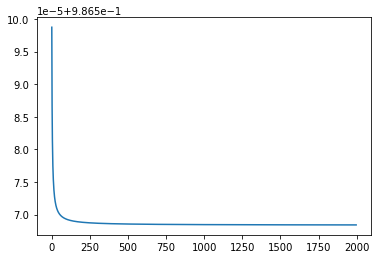

In [191]:
plt.plot(df.balance)

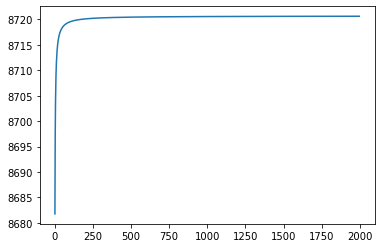

In [192]:
#plt.plot(abs(df.slippage) * (abs(df.balance[100]/df.slippage[0])))
plt.plot(df.dy)

In [39]:
# # objective function
# def objective(x, a, b, c):
#     return a / x**c + b

In [40]:
# from scipy.optimize import curve_fit
# from matplotlib import pyplot
# from numpy import arange
# # fit curve
# x = A_rng
# y = df.balance.values 
# popt, _ = curve_fit(objective, x, y)

In [41]:
# # summarize the parameter values
# a, b, c = popt
# print('y = %.7f / x^%.7f + %.7f' % (a, c, b))
# # plot input vs output
# pyplot.scatter(x, y)
# # define a sequence of inputs between the smallest and largest known inputs
# x_line = arange(min(x), max(x), 1)
# # calculate the output for the range
# y_line = objective(x_line, a, b, c)
# # create a line plot for the mapping function
# pyplot.plot(x_line, y_line, '--', color='red')
# pyplot.show()

# Loop over all swaps

In [197]:
#Start

A_rng = np.arange(1, 100, 0.5)
arr = np.zeros((len(A_rng), data_clean.shape[0], 8))

# stress_shock_swap = np.zeros(len(data_clean.token0_swap.values))
# max_dx = np.max(data_clean.token0_swap.values)
# j = 2000
# stress_shock_swap[j] = max_dx*8
# dx_stress_data = data_clean.token0_swap.values + stress_shock_swap

i = 0
for A in A_rng:

    C = 1300000
    x = C/2+20
    y = C/2
    lst = []
    A = A * 4
    D = x + y 

    for dx in data_clean.token0_swap.values:
        x1 = x + dx
        
        y1, dy, balance, slippage, spot = curve(x, dx, y, D, s, A)
        
#         b = (1 - 1 / A) * D - x1
#         dsc = D**3 / (A*x1) + b**2
#         y1 = (np.sqrt(dsc) + b) / 2
#         dy = y - y1
#         balance = 1 - abs(x1/(x1+y1) - 1/2) - abs(y1/(x1+y1) - 1/2)
#         spot = x*(A*x*y + D**3/4)/(y*(A*x**2 + D**3/4))
#         slippage = abs(abs(dx/dy) / spot - 1)
#         x1_solution = fsolve(cost_of_slippage, x, args = (x, y, s, A, D))
#         cost_of_slip = abs(x1_solution[0] - x)

        lst.append([x1, y1, dx, dy, balance, slippage, spot, D])

        x = x1
        y = y1

    arr[i] = lst
    i = i + 1
    #print(i)

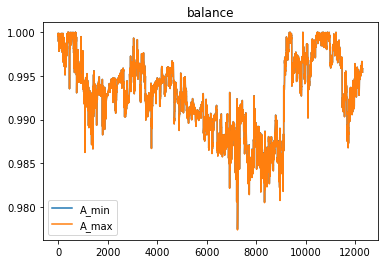

In [199]:
names = ["x_new", "y_new", "dx", "dy", 'balance', 'slippage', 'spot', 'cost']

i1 = 4
fig, ax = plt.subplots()
n = arr.shape[0] - 1
#plt.plot(arr_mix[n,:,i1], label='A_max_Curve')
#plt.plot(arr_sum[n,:,i1], label='A_max_Sum')
#plt.plot(arr_prod[n,:,i1], label='A_max_Prod')

#A_ = 'A=%f'{n}
plt.plot(arr[0,:,i1], label='A_min')
plt.plot(arr[n,:,i1], label='A_max')


#ax.axis('time')
plt.title(names[i1])
leg = ax.legend();

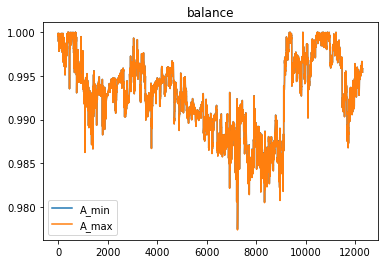

In [201]:
names = ["x_new", "y_new", "dx", "dy", 'balance', 'slippage', 'spot']

i1 = 4
fig, ax = plt.subplots()
n = arr.shape[0] - 1
#plt.plot(arr_mix[n,:,i1], label='A_max_Curve')
#plt.plot(arr_sum[n,:,i1], label='A_max_Sum')
#plt.plot(arr_prod[n,:,i1], label='A_max_Prod')

#A_ = 'A=%f'{n}
plt.plot(arr[0,:,i1], label='A_min')
plt.plot(arr[n,:,i1], label='A_max')

#ax.axis('time')
plt.title(names[i1])
leg = ax.legend();

# Comparison with constant sum and constant product

In [209]:
def const_product(x, dx, y, k, s):
    
    x1 = x + dx
    y1 = k / x1
    dy = y - y1
    spot = x/y
    slippage = abs((x/y - x1/y1)) / (x/y) #abs(dx) / x1 #
    #cost_of_slip = abs(x - np.sqrt(k*x/y*(1-s)))
    balance = 1 - abs(x1/(x1+y1) - 1/2) - abs(y1/(x1+y1) - 1/2)
    
    return y1, dy, balance, slippage, spot#, cost_of_slip

In [208]:
def const_sum(x, dx, y, k, s):
    
    x1 = x + dx
    y1 = k - x1
    dy = y - y1
    spot = x/y
    slippage = 0
    #cost_of_slip = 0
    balance = 1 - abs(x1/(x1+y1) - 1/2) - abs(y1/(x1+y1) - 1/2)
    
    return y1, dy, balance, slippage, spot#, cost_of_slip

In [207]:
def curve_mix(x, dx, y, D, s, A):
    
    x1 = x + dx

    b = (1 - 1 / A) * D - x1
    dsc = D**3 / (A*x1) + b**2
    y1 = (np.sqrt(dsc) + b) / 2
    dy = y - y1

    balance = 1 - abs(x1/(x1+y1) - 1/2) - abs(y1/(x1+y1) - 1/2)
    spot = x*(A*x*y + D**3/4)/(y*(A*x**2 + D**3/4))
    spot1 = x1*(A*x1*y1 + D**3/4)/(y1*(A*x1**2 + D**3/4))
    slippage = abs(spot1/spot - 1) #abs(abs(dx/dy) / spot - 1)
    #x1_solution = fsolve(cost_of_slippage, x, args = (x, y, s, A, D))
    #cost_of_slip = abs(x1_solution[0] - x)

    return y1, dy, balance, slippage, spot#, cost_of_slip

In [210]:
#Comparison with constant sum and constant product

A_rng = np.arange(1, 100, 0.5)

arr_mix = np.zeros((len(A_rng), data_clean.shape[0], 7))
arr_sum = np.zeros((len(A_rng), data_clean.shape[0], 7))
arr_prod = np.zeros((len(A_rng), data_clean.shape[0], 7))

i = 0
s = 0.0005
C = 1300000

for A in A_rng:

    x = C/2
    y = C/2
    
    lst_mix = []
    lst_sum = []
    lst_prod = []
    
    A = A * 4
    D = x + y 
    k = x * y

    y_mix = y
    y_sum = y
    y_prod = y
    
    for dx in data_clean.token0_swap.values:
        
        x1 = x + dx
        y1, dy, balance, slippage, spot = curve_mix(x, dx, y_mix, D, s, A)
        lst_mix.append([x1, y1, dx, dy, balance, slippage, spot])
        y_mix = y1
        
        y1, dy, balance, slippage, spot = const_sum(x, dx, y_sum, D, s)
        lst_sum.append([x1, y1, dx, dy, balance, slippage, spot])
        y_sum = y1
        
        y1, dy, balance, slippage, spot = const_product(x, dx, y_prod, k, s)
        lst_prod.append([x1, y1, dx, dy, balance, slippage, spot])
        y_prod = y1
        
        x = x1

    arr_mix[i] = lst_mix
    arr_sum[i] = lst_sum
    arr_prod[i] = lst_prod
    i = i + 1
    #print(i)

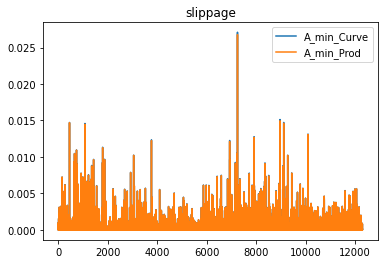

In [212]:
names = ["x_new", "y_new", "dx", "dy", 'balance', 'slippage', 'spot', 'cost']

i1 = 5
fig, ax = plt.subplots()
n = 1 #arr.shape[0] - 1
#plt.plot(arr_mix[n,:,i1], label='A_max_Curve')
#plt.plot(arr_sum[n,:,i1], label='A_max_Sum')
#plt.plot(arr_prod[n,:,i1], label='A_max_Prod')

plt.plot(arr_mix[n,:,i1], label='A_min_Curve')
#plt.plot(arr_sum[n,:,i1], label='A_min_Sum')
plt.plot(arr_prod[n,:,i1], label='A_min_Prod')

#ax.axis('time')
plt.title(names[i1])
leg = ax.legend();

# Optimization

In [213]:
def calc_balance(A, C, dx_data):

    x = C/2
    y = C/2
    lst = []
    A = A * 4
    D = x + y 

    for dx in dx_data:
        x1 = x + dx
        
        b = (1 - 1 / A) * D - x1

        dsc = 4*D * (D/2)**2 / (A*x1) + b**2
        y1 = (np.sqrt(dsc) + b) / 2
        dy = y - y1
   
        balance = 1 - abs(x1/(x1+y1) - 1/2) - abs(y1/(x1+y1) - 1/2)
        spot = x*(A*x*y + D**3/4)/(y*(A*x**2 + D**3/4))
        spot1 = x1*(A*x1*y1 + D**3/4)/(y1*(A*x1**2 + D**3/4))
        slippage = abs(spot1/spot - 1) #abs(abs(dx/dy) / spot - 1)
        #slippage = abs(abs(dx/dy) / spot - 1)

        lst.append(balance)

        x = x1
        y = y1

    return np.mean(lst)-0.935

In [214]:
A=100
C = 1300000
calc_balance(A, C, data_clean.token0_swap.values)

0.05786602426725007

In [215]:
from scipy.optimize import minimize
init_guess = 1
bounds = ((0.1, 4000),)
A = minimize(calc_balance, init_guess,
                       args=(C, data_clean.token0_swap.values), method='SLSQP',
                       options={'disp': False},
                       bounds=bounds)

In [216]:
A.x

array([1.])

In [90]:
# #df = df.rename(columns={0: "x_new", 1: "y_new", 2: "dx", 3: "dy", 4: 'balance', 5: 'slippage', 6: 'spot', 7: 'C', 8: 'cost'})
# names = ["x_new", "y_new", "dx", "dy", 'balance', 'slippage', 'spot', 'C', 'cost']
# i1 = 8
# #x = np.linspace(0, len(data_clean.token0_swap.values), len(data_clean.token0_swap.values))
# fig, ax = plt.subplots()
# plt.plot(arr[arr.shape[0]-1,:,i1], label='A_max')
# plt.plot(arr[0,:,i1], label='A_min')
# plt.plot(arr[100,:,i1], label='A_10')
# plt.plot(arr[100,:,i1], label='A_5')

# #ax.axis('equal')
# plt.title(names[i1])
# leg = ax.legend();

# Aggregated characteristics

In [217]:
#maximum difference between balances for min and max A
print(max((arr[arr.shape[0]-1,:,4] - arr[0,:,4])))
print(max((abs(arr[arr.shape[0]-1,:,5]) - abs(arr[0,:,5])))) #slippage
print(np.std(arr[arr.shape[0]-1,:,6]) - np.std(arr[0,:,6])) #std spot

1.665474507417386e-06
0.00013806060189969216
1.9983842408670058e-05


In [219]:
#Aggregated charachteristics
#i1 = 4
mean_balance = np.zeros(len(A_rng))
mean_slippage = np.zeros(len(A_rng))
max_slippage = np.zeros(len(A_rng))
min_balance = np.zeros(len(A_rng))
amplitude = np.zeros(len(A_rng))
price_std = np.zeros(len(A_rng))
#cost_slip = np.zeros(len(A_rng))
#sum_ = 0

for i in range(0,len(A_rng)):
    mean_slippage[i] = np.mean(abs(arr[i,:,5]))
    max_slippage[i] = np.max(abs(arr[i,:,5]))
    mean_balance[i] = np.mean(arr[i,:,4])
    min_balance[i] = np.min(arr[i,:,4])
    amplitude[i] = (np.max(arr[i,:,6]) - np.min(arr[i,:,6]))/np.min(arr[i,:,6])
    price_std[i] = np.std(arr[i,:,6])
    #cost_slip[i] = np.mean(arr[i,:,8])
    #sum_ = sum_ + mean_[i]

df_stat = pd.DataFrame()
df_stat['mean_balance'] = mean_balance
df_stat['min_balance'] = min_balance
df_stat['mean_slippage'] = mean_slippage
df_stat['max_slippage'] = max_slippage
df_stat['amplitude'] = amplitude
df_stat['price_std'] = price_std
#df_stat['cost_slip'] = cost_slip

In [220]:
df_stat

,mean_balance,min_balance,mean_slippage,max_slippage,amplitude,price_std
0,0.992864,0.977446,0.000409,0.027054,0.052844,0.008886
1,0.992861,0.977425,0.000409,0.027091,0.052889,0.008892
2,0.992859,0.977412,0.000409,0.027113,0.052916,0.008895
3,0.992858,0.977403,0.000409,0.027128,0.052933,0.008897
4,0.992857,0.977397,0.000409,0.027139,0.052946,0.008899
...,...,...,...,...,...,...
193,0.992852,0.977361,0.000410,0.027192,0.053004,0.008906
194,0.992852,0.977361,0.000410,0.027192,0.053004,0.008906
195,0.992852,0.977361,0.000410,0.027192,0.053004,0.008906
196,0.992852,0.977361,0.000410,0.027192,0.053004,0.008906


In [221]:
n = df_stat.shape[0] - 1
balance_sensitivity = (df_stat.mean_balance[0] - df_stat.mean_balance[n])/df_stat.mean_balance[0] * 100
slippage_sensitivity = (df_stat.mean_slippage[0] - df_stat.mean_slippage[n]) * 100
print('balance_sensitivity, %:', balance_sensitivity)
print('slippage_sensitivity, %:', slippage_sensitivity)

balance_sensitivity, %: 0.0011541440142833878
slippage_sensitivity, %: -9.686088757638353e-05


In [222]:
#fitering
balance_thr = 0.99
price_std_thr = 0.005

df_stat[df_stat.price_std < price_std_thr]
df_stat[(df_stat.mean_balance < balance_thr) & (df_stat.price_std < price_std_thr)]

,mean_balance,min_balance,mean_slippage,max_slippage,amplitude,price_std


Text(0.5, 1.0, 'mean_balance')

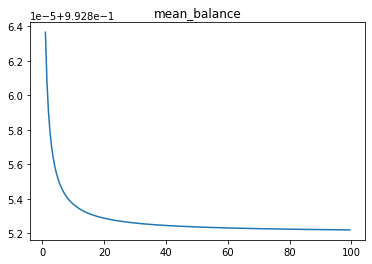

In [223]:
name = 'mean_balance'
plt.plot(A_rng, df_stat[name])
plt.title(name)

Text(0.5, 1.0, 'amplitude')

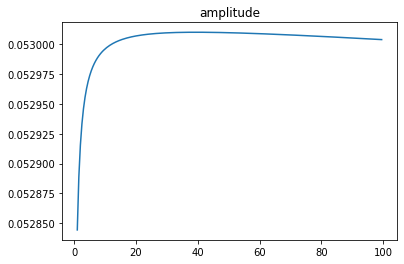

In [224]:
name = 'amplitude'
plt.plot(A_rng, df_stat[name])
plt.title(name)

Text(0.5, 1.0, 'price_std')

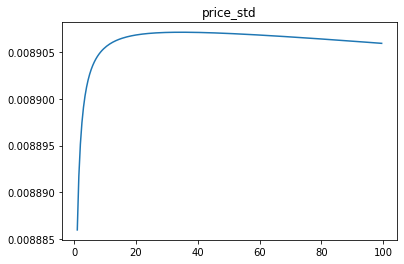

In [225]:
name = 'price_std'
plt.plot(A_rng, df_stat[name])
plt.title(name)

Text(0.5, 1.0, 'mean_slippage')

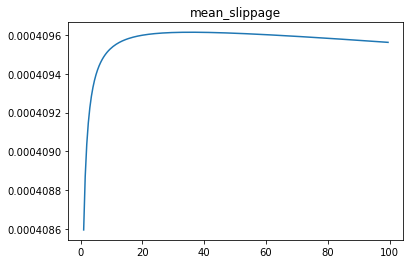

In [226]:
name = 'mean_slippage'
plt.plot(A_rng, df_stat[name])
plt.title(name)

# Dependence of Sensitivity wrt A on D

In [148]:
D_rng

array([  30000,  130000,  230000,  330000,  430000,  530000,  630000,
        730000,  830000,  930000, 1030000, 1130000, 1230000])

In [152]:
A_rng = np.arange(1, 100, 0.5)
C_rng = np.arange(30000, 1300000, 10000)

cols = ['D',
        'D/max dx',
        'mean_balance_A_min', 
        'min_balance_A_min', 
        'mean_slippage_A_min', 
        'max_slippage_A_min', 
        'amplitude_A_min',
        'price_std_A_min', 
    
        'mean_balance_A_max', 
        'min_balance_A_max', 
        'mean_slippage_A_max', 
        'max_slippage_A_max', 
        'amplitude_A_max',
        'price_std_A_max']

lst_C = []
#C = 1300000

for C in C_rng:

    arr = np.zeros((len(A_rng), data_clean.shape[0], 7))
    i = 0

    for A in A_rng:

        x = C/2
        y = C/2
        lst = []
        A = A * 4
        D = x + y 

        for dx in data_clean.token0_swap.values: 
            x1 = x + dx

            b = (1 - 1 / A) * D - x1
            dsc = D**3 / (A*x1) + b**2
            y1 = (np.sqrt(dsc) + b) / 2
            dy = y - y1

            balance = 1 - abs(x1/(x1+y1) - 1/2) - abs(y1/(x1+y1) - 1/2)
            spot = x*(A*x*y + D**3/4)/(y*(A*x**2 + D**3/4))
            spot1 = x1*(A*x1*y1 + D**3/4)/(y1*(A*x1**2 + D**3/4))
            slippage = abs(spot1/spot - 1)#abs(abs(dx/dy) / spot - 1)
            #x1_solution = fsolve(cost_of_slippage, x, args = (x, y, s, A, D))
            #cost_of_slip = abs(x1_solution[0] - x)

            lst.append([x1, y1, dx, dy, balance, slippage, spot])

            x = x1
            y = y1

        arr[i] = lst
        i = i + 1

    w0_1 = D
    w0_2 = max(abs(data_clean.token0_swap.values)) / D

    w1 = np.mean(arr[0,:,4])
    print(w1)
    w2 = np.min(arr[0,:,4])
    w3 = np.mean(abs(arr[0,:,5]))
    w4 = np.max(abs(arr[0,:,5]))
    w5 = (np.max(arr[0,:,6]) - np.min(arr[0,:,6]))/np.min(arr[0,:,6])
    w6 = np.std(arr[0,:,6])

    n = len(A_rng) - 1
    v1 = np.mean(arr[n,:,4])
    v2 = np.min(arr[n,:,4])
    v3 = np.mean(abs(arr[n,:,5]))
    v4 = np.max(abs(arr[n,:,5]))
    v5 = (np.max(arr[n,:,6]) - np.min(arr[n,:,6]))/np.min(arr[n,:,6])
    v6 = np.std(arr[n,:,6])

    lst_C.append([w0_1, w0_2, w1, w2, w3, w4, w5, w6, v1, v2, v3, v4, v5, v6])

0.719610582783727
0.7833374183007035
0.8238494059890369
0.8517294022996368
0.8720437647175022
0.8874875487584551
0.8996178378902776
0.9093943451026608
0.917439851832168
0.9241757470339449
0.9298971707785366
0.9348169163793378
0.9390922342259638
0.9428418206498456
0.9461569381161645
0.9491089004618727
0.951754236409137
0.9541383294869943
0.9562980338643464
0.9582635869540352
0.9600600297546847
0.9617082765815254
0.9632259311178134
0.9646279162705329
0.9659269655577926
0.9671340102733201
0.9682584873280561
0.9693085860968815
0.9702914479149419
0.9712133284888251
0.9720797310216014
0.972895516031461
0.9736649924881899
0.9743919938723004
0.9750799419881901
0.9757319007710505
0.976350621871094
0.9769385834444386
0.9774980233029574
0.9780309673573415
0.9785392541149117
0.9790245558561003
0.9794883970032636
0.979932170106677
0.9803571498006506
0.9807645050242082
0.9811553097529573
0.9815305524495198
0.9818911444075362
0.9822379271374595
0.9825716789200964
0.9828931206352776
0.9832029209574948

In [157]:
n

197

In [167]:
df_sens = pd.DataFrame(lst_C, columns=cols)
df_sens

,D,D/max dx,mean_balance_A_min,min_balance_A_min,mean_slippage_A_min,max_slippage_A_min,amplitude_A_min,price_std_A_min,mean_balance_A_max,min_balance_A_max,mean_slippage_A_max,max_slippage_A_max,amplitude_A_max,price_std_A_max
0,30000.0,0.290690,0.719611,0.275746,0.017103,1.906141,7.314755,0.722930,0.691552,0.057062,0.022911,13.149202,41.736199,1.185075
1,40000.0,0.218017,0.783337,0.398543,0.012850,1.253469,3.968031,0.454184,0.768437,0.269592,0.014820,2.404796,6.702612,0.554114
2,50000.0,0.174414,0.823849,0.492354,0.010302,0.923548,2.626075,0.328202,0.814680,0.413809,0.011342,1.329742,3.458657,0.371481
3,60000.0,0.145345,0.851729,0.563210,0.008606,0.729161,1.935905,0.256146,0.845535,0.510950,0.009253,0.932789,2.314382,0.279944
4,70000.0,0.124581,0.872044,0.617679,0.007393,0.602011,1.523791,0.209757,0.867584,0.580570,0.007837,0.723362,1.734109,0.224702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,1250000.0,0.006977,0.992593,0.976563,0.000425,0.028146,0.055010,0.009246,0.992581,0.976471,0.000426,0.028296,0.055182,0.009268
123,1260000.0,0.006921,0.992652,0.976749,0.000422,0.027921,0.054563,0.009172,0.992640,0.976658,0.000423,0.028068,0.054733,0.009193
124,1270000.0,0.006867,0.992709,0.976931,0.000418,0.027699,0.054123,0.009099,0.992698,0.976841,0.000419,0.027844,0.054290,0.009119
125,1280000.0,0.006813,0.992766,0.977110,0.000415,0.027481,0.053690,0.009027,0.992755,0.977022,0.000416,0.027623,0.053855,0.009047


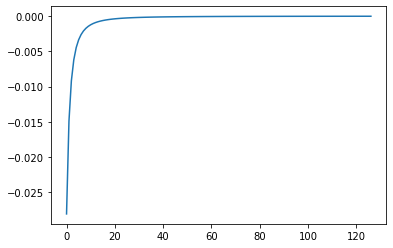

In [170]:
#plt.plot(df1.mean_balance_A_min)
#plt.plot(C_rng, df_sens.mean_balance_A_max)
plt.plot(df_sens.mean_balance_A_max - df_sens.mean_balance_A_min)

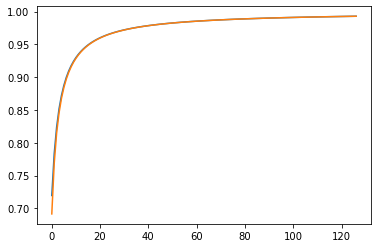

In [171]:
plt.plot(df_sens.mean_balance_A_min)
plt.plot(df_sens.mean_balance_A_max)

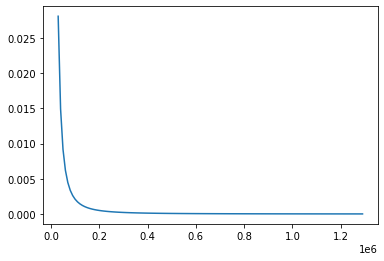

In [172]:
plt.plot(C_rng, (df_sens.mean_balance_A_min - df_sens.mean_balance_A_max))

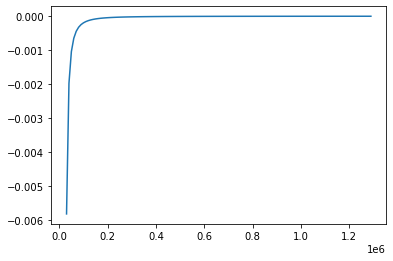

In [173]:
plt.plot(C_rng, df1.mean_slippage_A_min - df1.mean_slippage_A_max)

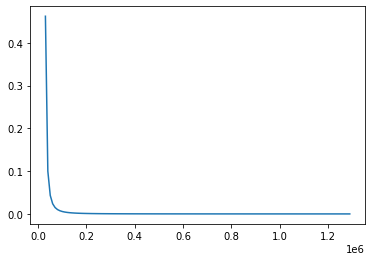

In [174]:
plt.plot(C_rng, df_sens.price_std_A_max - df_sens.price_std_A_min)

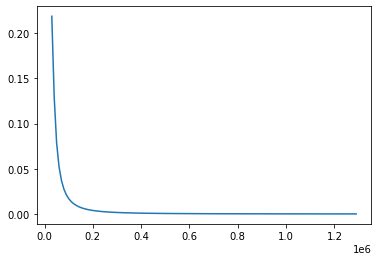

In [175]:
plt.plot(C_rng, (df_sens.min_balance_A_min - df_sens.min_balance_A_max))